# K-means

<img src="./figures/kmeans.jpg" width="700px"/>

## Exercice


### Generate data
1. Le code de cette section génère des data appartenant à 3 classes différentes.<br>
   Les clusters sont relativement séparés et devraient pouvoir être reconstruits de manière acceptable grâce à l'algorithme d'apprentissage non-supervisé des **K moyennes** ou **K-means**.<br>
   Comprenez ce code...
   
   
### Model
2. Compétez la méthode `_initialize_centroids(...)` qui, étant donné un ensemble de points `X` (**features**), retourne un array de $K$ centroïdes au hasard, où $K$ est le nombre de clusters désirés.


3. Compétez la méthode `_assign_clusters(..)` qui, étant donné un ensemble de points `X` et un ensemble de $K$ centroïdes `centroids`, retourne la liste des clusters associée aux points de `X`. 

   Pour chaque point $x$ de `X`, on calcule sa distance $d_i$ à chacun des centroïde $c_i$ de `centroids`, et on lui assigne le cluster $i$ pour lequelle la distance $d_i$ est minimale.
        

4. Compétez la méthode `_compute_centroids(...)` qui, étant donné un ensemble de points `X` et un ensemble de clusters correspondant `clusters`, recalcule les $K$ centroïdes `centroids` de ces clusters.

   Les $i$-ème centroïde $c_i$ correspond à la moyenne des points faisant partie cu cluster $i$.


5. Compétez la méthode `fit()`qui, étant donné un ensemble de points `X`, implémente l'algorithme **$K$-means** assoocié aux data `X`. Cette méthode retourne les `clusters` et `centroids` calculés par l'algorithme ci-dessous:
    
   <img src="./figures/kmeans_algo.jpg" width="700px"/>


6. Compétez la méthode `predict(...)` qui, étant donné un point `x_new`, calcule le cluster `c_new_hat` associée à ce point. La documentation de la méthode donne plus de détails.<br>



### Results
7. - Instanciez un **$K$-means** avec $K=3$;
   - Fittez votre algorithme sur les data `X`.
   - Faites le graphes de vos clusters. Les points qui sont prédits comme classe 1, classe 2 et classe 3 seront représentés de différentes couleurs.
   
   
### Generalization

8. Générez $10K$ points de dimension $10$ avec $5$ classes différentes (fonction `make_blobs`).<br>
Visualiizez vos point en dimension $2$ grâce à l'algorithme t-SNE:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html<br>
Puis réentraînez votre algorithme $K$-means sur ce nouveau dataset, et visualizez les clusters obtenus et leurs centroïdes à nouveau par le biais de l'algorithme t-SNE.

## Libraries

In [28]:
from collections import Counter

import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Generate data

In [2]:
# generate data
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=4.0, random_state=42)

In [3]:
X.shape, y.shape

((500, 2), (500,))

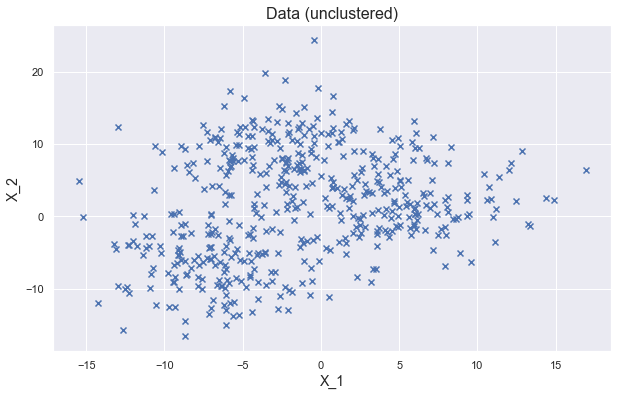

In [4]:
# plot data
plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1],marker = 'x')
plt.xlabel("X_1", fontsize=14)
plt.ylabel("X_2", fontsize=14)
# plt.legend(fontsize=14)
plt.title("Data (unclustered)", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()

## Model

In [5]:
class Kmeans():
    """
    Implements the K-means algorithm.
    """
    
    def __init__(self, k=3):
        """
        Constructor.
        
        Parameters
        ----------
        
        k : int
            Number of clusters to be constructed.
        """
        
        self.k = k
        self.clusters = None
        self.centroids = None
        
    
    def _initialize_centroids(self, X):
        """
        Initialize k centroids from a normal distribution.
        The mean of the distribution is the mean of the data X.
        The std of the distribution is 1.0.
        The k centroids are stored into an array.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
            
        Returns
        -------
        centroids : ndarray
            Array of k random centroids, each of dim p (k x p).
        """
        
        centre = np.mean(X, axis=0)
        centroids = np.random.normal(loc=centre,
                                     scale=1,
                                     size=(self.k, X.shape[1]))
        
        return centroids

    
    def _assign_clusters(self, X, centroids):
        """
        Given the data X and the current centroids,
        this function computes the cluster assignment
        of the data.
        
        Each data point of X is assigned to the cluster
        whose centroid is the closest to it.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
        centroids : ndarray
            Array of k centroids (dim k x X.shape[1]).
            
        Returns
        -------
        clusters : ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
        """
        
        distances = np.zeros(shape=(X.shape[0], self.k))

        for i in range(self.k):
            
            # distance to the i-th centroid
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)

        clusters = distances.argmin(axis=1)
        
        return clusters

    
    def _compute_centroids(self, X, clusters):
        """
        Compute the new centroids of the data X according to
        their cluster assignment clusters.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p
        clusters : ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
        
        Returns
        -------
        centroids : ndarray
            Array of k centroids (dim k x X.shape[1]).
        """
        
        centroids = -np.ones(shape=(self.k, X.shape[1]))

        for i in range(self.k):

            X_class = X[clusters==i]
            centroids[i] = X_class.mean(axis=0)
        
        return centroids
    
    
    def fit(self, X, stop_dist=0.01, max_iter=1000):
        """
        Implements the K-means algorithm for the data X.
        
        First, the algorithm initializes random centroids
        via the _initialize_centroids methods. 
        Then, the algorithm alternates between the
        _assign_clusters and the _compute_centroids methods
        until a stop criterion is met.
        The algorithm stops when the distances between the 
        previous and new centroids hasn't changed too much,
        i.e., is less than stop_dist, or when the maximum
        number of iterations has been reached.
        The method re-assigns the attributes self.clusters
        and self.centroids to the clusters and centroids
        that it has computed.
        
        Parameters
        ----------
        X : ndarray
            Initial data of dim N x p.
        stop_dist : float
            Minimal distance between previous and new centroid
        max_iter : int
            maximum number of iterations.
        
        Returns
        -------
        clusters, centroids : ndarray, ndarray
            Array of clusters assigned to the points of X 
            (dim X.shape[0]).
            Array of k centroids (dim k x X.shape[1]).
        """
        it = 0
        dist = np.inf * np.ones(shape=(self.k))
        stop_dist = stop_dist * np.ones(shape=(self.k))
        centroids = self._initialize_centroids(X)
        
        print("Fitting in progress:")
        
        while (dist > stop_dist).any() and it <= max_iter:
            
            print(".", end="")
            clusters = self._assign_clusters(X, centroids)
            new_centroids = self._compute_centroids(X, clusters)
            dist = np.linalg.norm(centroids - new_centroids, axis=1)
            centroids = new_centroids
            it += 1
        
        self.clusters = clusters
        self.centroids = centroids
        
        
    def predict(self, x_new):
        """
        Computes the cluster prediction c_new_hat associated 
        to a new point x_new. The cluster c_new_hat is the one 
        whose centroid is the closest to x_new.

        Parameters
        ----------
        x_new : Union[ndarray, list]
            New point of dim p to be classified by the $K$-means algo.
            
        Returns
        -------
        c_new_hat : int
            Cluster prediction for the point x_new.
        """
        
        dist = np.zeros(shape=(self.k))

        for i in range(self.k):
            
            # distance to the i-th centroid
            dist[i] = np.linalg.norm(x_new - self.centroids[i])

        c_new_hat = dist.argmin()
        
        return c_new_hat

## Results

In [6]:
kmeans = Kmeans(k=3)

In [7]:
centroids = kmeans._initialize_centroids(X)

In [8]:
centroids

array([[-0.35293795,  0.94020391],
       [-1.79233109,  1.73538866],
       [-0.39687006,  2.16561213]])

In [9]:
kmeans.fit(X, max_iter=100)
clusters, centroids = kmeans.clusters, kmeans.centroids

Fitting in progress:
........

In [10]:
centroids

array([[-6.59672862, -6.42369954],
       [-3.09219297,  9.2714299 ],
       [ 5.10572489,  1.81409112]])

In [11]:
# clusters

In [12]:
kmeans.predict([-6.59672862, -6.42369954])

0

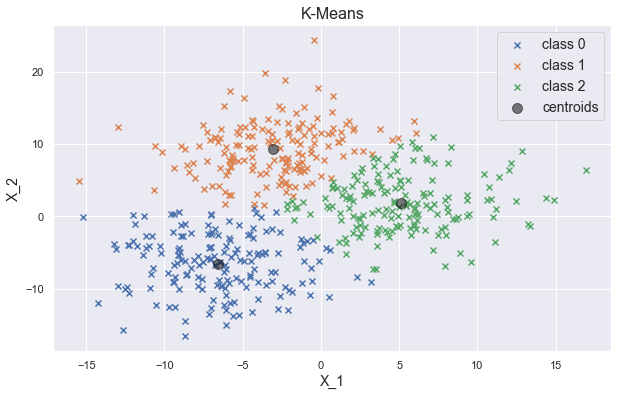

In [13]:
# k-means clustering
plt.figure(figsize=(10, 6))

plt.scatter(X[clusters==0][:, 0], X[clusters==0][:, 1], 
            color="C0", alpha=1, marker = 'x', label="class 0")
plt.scatter(centroids[0][0], centroids[0][0], 
            color="black", alpha=0.5, s=100)

plt.scatter(X[clusters==1][:, 0], X[clusters==1][:, 1], 
            color="C1", alpha=1, marker = 'x', label="class 1")
plt.scatter(centroids[1][0], centroids[1][1], 
            color="black", alpha=0.5, s=100)

plt.scatter(X[clusters==2][:, 0], X[clusters==2][:, 1], 
            color="C2", alpha=1, marker = 'x', label="class 2")
plt.scatter(centroids[2][0], centroids[2][1], 
            color="black", alpha=0.5, s=100, label="centroids")

plt.xlabel("X_1", fontsize=14)
plt.ylabel("X_2", fontsize=14)
plt.legend(fontsize=14)
plt.title("K-Means", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()

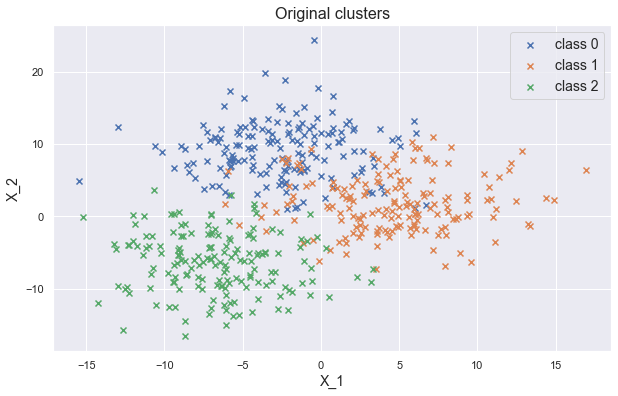

In [14]:
# original clusters
plt.figure(figsize=(10, 6))

plt.scatter(X[y==0][:, 0], X[y==0][:, 1], 
            color="C0", alpha=1, marker = 'x', label="class 0")

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], 
            color="C1", alpha=1, marker = 'x', label="class 1")

plt.scatter(X[y==2][:, 0], X[y==2][:, 1], 
            color="C2", alpha=1, marker = 'x', label="class 2")


plt.xlabel("X_1", fontsize=14)
plt.ylabel("X_2", fontsize=14)
plt.legend(fontsize=14)
plt.title("Original clusters", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()

In [15]:
# The algo might have permuted the clusters
# original -> new
# 0 -> ?
# 1 -> ?
# 2 -> ?

In [16]:
y_new = -np.ones(X.shape[0])
y_new[y==0] = 2
y_new[y==1] = 1
y_new[y==2] = 0

In [17]:
print(classification_report(y_new, clusters))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       166
         1.0       0.09      0.09      0.09       167
         2.0       0.11      0.11      0.11       167

    accuracy                           0.39       500
   macro avg       0.39      0.39      0.39       500
weighted avg       0.38      0.39      0.39       500



## Generalization

In [62]:
# generate data
X, y = make_blobs(n_samples=10000, n_features=10, centers=5, cluster_std=1.0, random_state=42)

In [63]:
X.shape, y.shape

((10000, 10), (10000,))

In [64]:
kmeans_2 = Kmeans(k=5)

In [65]:
kmeans_2.fit(X, max_iter=100)
clusters_2, centroids_2 = kmeans_2.clusters, kmeans_2.centroids

Fitting in progress:
....

In [66]:
centroids_2.shape

(5, 10)

In [67]:
# Visualize high dimensional data with t-SNE
tsne = TSNE(n_components=2, 
            learning_rate='auto', 
            init='random', 
            perplexity=3)

tmp = tsne.fit_transform(np.vstack([X, centroids_2]))
X_tsne = tmp[:-5]
centroids_tsne = tmp[-5:]

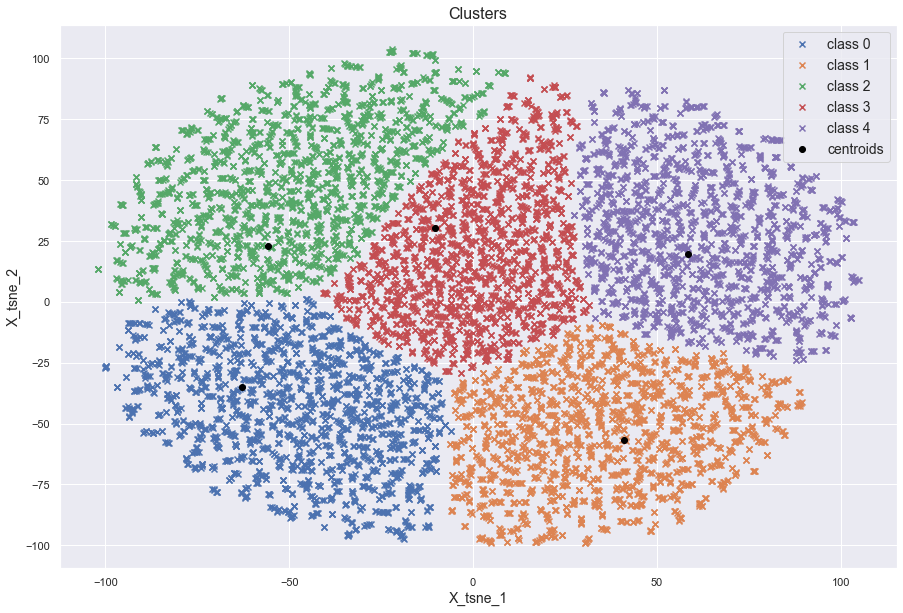

In [69]:
# original clusters
plt.figure(figsize=(15, 10))

plt.scatter(X_tsne[y==0][:, 0], X_tsne[y==0][:, 1], color="C0", alpha=1, marker = 'x', label="class 0")
plt.scatter(X_tsne[y==1][:, 0], X_tsne[y==1][:, 1], color="C1", alpha=1, marker = 'x', label="class 1")
plt.scatter(X_tsne[y==2][:, 0], X_tsne[y==2][:, 1], color="C2", alpha=1, marker = 'x', label="class 2")
plt.scatter(X_tsne[y==3][:, 0], X_tsne[y==3][:, 1], color="C3", alpha=1, marker = 'x', label="class 3")
plt.scatter(X_tsne[y==4][:, 0], X_tsne[y==4][:, 1], color="C4", alpha=1, marker = 'x', label="class 4")

plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], color="black", alpha=1, marker = 'o', label="centroids")

plt.xlabel("X_tsne_1", fontsize=14)
plt.ylabel("X_tsne_2", fontsize=14)
plt.legend(fontsize=14)
plt.title("Clusters", fontsize=16)

# plt.savefig("kmeans.jpg")
plt.show()